In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.experimental import enable_iterative_imputer

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
import re 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
#dali patnikot preziveal lii ne

In [199]:
df = pd.read_csv("titanic_survival.csv")

In [200]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1.0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0.0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0.0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     325 non-null    float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [202]:
df.drop(columns=['PassengerId'], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1.0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0.0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0.0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0.0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [203]:
df["Name"].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [204]:
#ima premnogu unique names a i ne pomaga imeto na patnikot vo predviduvanje na toa dali preziveal ili ne i pravime drop
df.drop(columns=['Name'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1.0,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0.0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0.0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0.0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1.0,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0.0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0.0,3,male,NaN,0,0,359309,8.0500,NaN,S


In [205]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [206]:
df.isnull().sum()

Survived     93
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [207]:
#Enkodiram sex so label encoder za sex da mozam da vidam korelacija 
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [208]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,0.0,1,1,46.0,0,0,694,26.0,NaN,S


In [209]:
df["Ticket"].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [210]:
df.drop(columns=['Ticket'], inplace=True)

In [211]:
df.dropna(subset=["Survived"], axis=0, inplace=True)

In [212]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,1,34.5,0,0,7.8292,NaN,Q
1,1.0,3,0,47.0,1,0,7.0000,NaN,S
2,0.0,2,1,62.0,0,0,9.6875,NaN,Q
3,0.0,3,1,27.0,0,0,8.6625,NaN,S
7,0.0,2,1,26.0,1,1,29.0000,NaN,S


In [213]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          70
SibSp         0
Parch         0
Fare          0
Cabin       256
Embarked      0
dtype: int64

In [214]:
#Ima premnogu null vrednosti
df.drop(columns=['Cabin'], inplace=True)

In [215]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,34.5,0,0,7.8292,Q
1,1.0,3,0,47.0,1,0,7.0000,S
2,0.0,2,1,62.0,0,0,9.6875,Q
3,0.0,3,1,27.0,0,0,8.6625,S
7,0.0,2,1,26.0,1,1,29.0000,S


<Axes: >

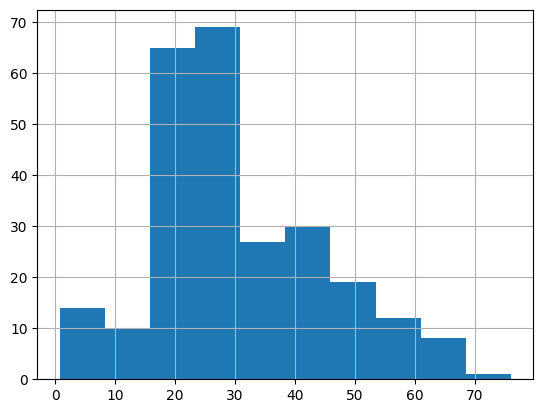

In [216]:
df["Age"].hist()

In [217]:
df['Embarked'].value_counts()

Embarked
S    210
C     76
Q     39
Name: count, dtype: int64

In [218]:
df = pd.concat([df, pd.get_dummies(df["Embarked"])], axis=1)
df.drop(columns=["Embarked"], inplace=True)

In [219]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3,1,34.5,0,0,7.8292,False,True,False
1,1.0,3,0,47.0,1,0,7.0000,False,False,True
2,0.0,2,1,62.0,0,0,9.6875,False,True,False
3,0.0,3,1,27.0,0,0,8.6625,False,False,True
7,0.0,2,1,26.0,1,1,29.0000,False,False,True


In [220]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         70
SibSp        0
Parch        0
Fare         0
C            0
Q            0
S            0
dtype: int64

<Axes: >

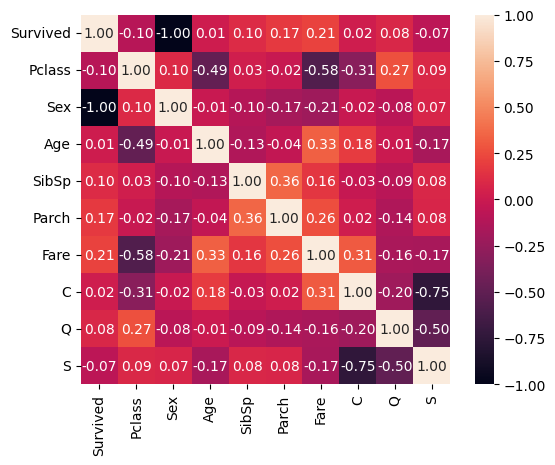

In [221]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

In [222]:
median_imputer = SimpleImputer(strategy="median")
df[['Age']] = median_imputer.fit_transform(df[['Age']])

In [223]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [224]:
#dali da dropnam edna od C Q S (multicollinearity)

In [225]:
X, y = df.drop(columns=["Survived"]), df["Survived"]

In [226]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [227]:
scaler = MinMaxScaler()

In [228]:
train_X = scaler.fit_transform(train_X)

In [229]:
test_X = scaler.transform(test_X)

In [230]:
classifier = LogisticRegression().fit(train_X, train_y)

In [231]:
pred_y = classifier.predict(test_X)

In [232]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [233]:
#Imame overfit

In [234]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3,1,34.5,0,0,7.8292,False,True,False
1,1.0,3,0,47.0,1,0,7.0000,False,False,True
2,0.0,2,1,62.0,0,0,9.6875,False,True,False
3,0.0,3,1,27.0,0,0,8.6625,False,False,True
7,0.0,2,1,26.0,1,1,29.0000,False,False,True


In [235]:
#Probuvam da dropnam Sex bidejki ima golema korelacija
X, y = df.drop(columns=["Survived","Sex"]), df["Survived"]

In [236]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [237]:
scaler = MinMaxScaler()

In [238]:
train_X = scaler.fit_transform(train_X)

In [239]:
test_X = scaler.transform(test_X)

In [240]:
classifier = LogisticRegression().fit(train_X, train_y)

In [241]:
pred_y = classifier.predict(test_X)

In [242]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.62      0.95      0.75        41
         1.0       0.00      0.00      0.00        24

    accuracy                           0.60        65
   macro avg       0.31      0.48      0.38        65
weighted avg       0.39      0.60      0.47        65



In [243]:
df['Survived'].value_counts()

Survived
0.0    210
1.0    115
Name: count, dtype: int64

In [244]:
data_survived = df.loc[df['Survived'] == 1]
data_survived

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
1,1.0,3,0,47.0,1,0,7.0000,False,False,True
8,1.0,3,0,18.0,0,0,7.2292,True,False,False
12,1.0,1,0,23.0,1,0,82.2667,False,False,True
18,1.0,3,0,27.0,1,0,7.9250,False,False,True
19,1.0,3,0,45.0,0,0,7.2250,True,False,False
...,...,...,...,...,...,...,...,...,...,...
408,1.0,3,0,27.0,0,0,7.7208,False,True,False
410,1.0,3,0,27.0,0,0,7.7500,False,True,False
411,1.0,1,0,37.0,1,0,90.0000,False,True,False
412,1.0,3,0,28.0,0,0,7.7750,False,False,True


In [245]:
data_no_survive = df.loc[df['Survived'] == 0]
data_no_survive = data_no_survive.sample(130)
data_no_survive

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
195,0.0,3,1,33.0,0,0,7.8542,False,False,True
215,0.0,1,1,42.0,0,0,42.5000,False,False,True
126,0.0,3,1,22.0,0,0,7.7958,False,False,True
115,0.0,3,1,18.0,1,0,14.4542,True,False,False
187,0.0,3,1,17.0,2,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
144,0.0,1,1,42.0,0,0,26.5500,False,False,True
183,0.0,3,1,27.0,0,0,7.7500,False,True,False
28,0.0,1,1,41.0,0,0,30.5000,False,False,True
80,0.0,3,1,6.0,1,1,15.2458,True,False,False


In [246]:
new_data = pd.concat([data_no_survive, data_survived])
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
195,0.0,3,1,33.0,0,0,7.8542,False,False,True
215,0.0,1,1,42.0,0,0,42.5000,False,False,True
126,0.0,3,1,22.0,0,0,7.7958,False,False,True
115,0.0,3,1,18.0,1,0,14.4542,True,False,False
187,0.0,3,1,17.0,2,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
408,1.0,3,0,27.0,0,0,7.7208,False,True,False
410,1.0,3,0,27.0,0,0,7.7500,False,True,False
411,1.0,1,0,37.0,1,0,90.0000,False,True,False
412,1.0,3,0,28.0,0,0,7.7750,False,False,True


In [247]:
new_data = new_data.sample(frac=1)
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
412,1.0,3,0,28.0,0,0,7.7750,False,False,True
292,0.0,3,1,27.0,0,0,7.2292,True,False,False
243,0.0,3,1,27.0,0,0,7.8875,False,False,True
240,1.0,1,0,55.0,0,0,27.7208,True,False,False
233,0.0,3,1,27.0,0,0,7.8792,False,True,False
...,...,...,...,...,...,...,...,...,...,...
396,0.0,3,1,24.0,0,0,7.2500,False,True,False
301,0.0,2,1,27.0,0,0,15.0458,True,False,False
408,1.0,3,0,27.0,0,0,7.7208,False,True,False
362,1.0,2,0,31.0,0,0,21.0000,False,False,True


In [248]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 412 to 92
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  245 non-null    float64
 1   Pclass    245 non-null    int64  
 2   Sex       245 non-null    int64  
 3   Age       245 non-null    float64
 4   SibSp     245 non-null    int64  
 5   Parch     245 non-null    int64  
 6   Fare      245 non-null    float64
 7   C         245 non-null    bool   
 8   Q         245 non-null    bool   
 9   S         245 non-null    bool   
dtypes: bool(3), float64(3), int64(4)
memory usage: 16.0 KB


In [249]:
new_data['Survived'].value_counts()

Survived
0.0    130
1.0    115
Name: count, dtype: int64

In [250]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [251]:
X, y = new_data.drop(columns=["Survived","Sex"]), new_data["Survived"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

In [252]:
print(new_data.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')


In [253]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.50      0.71      0.59        24
         1.0       0.53      0.32      0.40        25

    accuracy                           0.51        49
   macro avg       0.52      0.51      0.49        49
weighted avg       0.52      0.51      0.49        49



In [268]:
X, y = new_data.drop(columns=["Survived","Sex"]), new_data["Survived"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
model = XGBClassifier(n_estimators=200,learning_rate=0.05,n_jobs=-1,)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [269]:
print("Accuracy:", metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.5918367346938775


In [270]:
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        24
         1.0       0.61      0.56      0.58        25

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49

[[15  9]
 [11 14]]


In [271]:
from lightgbm import LGBMClassifier
X, y = new_data.drop(columns=["Survived","Sex"]), new_data["Survived"]
X_train, X_test, Y_train, test_y = train_test_split(X, y, test_size=0.2)
clf = LGBMClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

[LightGBM] [Info] Number of positive: 85, number of negative: 111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433673 -> initscore=-0.266879
[LightGBM] [Info] Start training from score -0.266879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [272]:
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[12  7]
 [17 13]]
              precision    recall  f1-score   support

         0.0       0.41      0.63      0.50        19
         1.0       0.65      0.43      0.52        30

    accuracy                           0.51        49
   macro avg       0.53      0.53      0.51        49
weighted avg       0.56      0.51      0.51        49

